<h2 style="color:blue"> PRUEBA TÉCNICA PARA TIGO. </h2>
<h3> Santiago Gonzalez Quiroz. sangonzalezqui@unal.edu.co. 301 202 98 52 </h3>
<br> <br>
<p> Dada la información que se tiene en la base de datos y pensando en machine learning, parece que para una compañia que preste este tipo de servicios, lo que le sería más util, es poder predecir si un cliente con determinadas carateristicas cancelará o no los servicios que tiene contratados con la empresa. En palabras más directas, lo que se piensa hacer es por medio de un algoritmo de clasificación como <strong> Los K vecinos más cercanos </strong>, poder clasificar a un cliente como posible cancelador de servicios o no. La variable a predecir es entonces: Churn. </p>

In [402]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline


df=pd.read_csv("Prueba_Tecnica_Tigo.csv") ##Leer la BD.
auxiliar=df.copy()
df["gender"]
df.info() ##Conocer un poco de la estructura de las columnas, así como los tipos de valores que contien
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<h3 style="color:blue">Conociendo la estructura de la base de datos: </h3>
<ul>
<li>Parece ser que en ninguna columna hay valores faltantes, por lo que podría no ser necesario aplicar el manejo de inexistentes. Todas las columnas tienen 7043 entradas no nulas.
</li>
<li>Se puede evidenciar que muchas de las columnas no son numericas, por lo que hay ocuparse de ello. Dichas columnas son
Las que aparecen con el tipo object. Son variables categoricas, las cuales toca representar numericamente sus posibles valores.
</li>
    <li>De entrada se sabe que la columna customer ID se puede despreciar, pues no es relavante en el modelo.
</li>
    <li>La columna TotalCharges en realidad representa valores númericos, es necesario corregir ese tipo object que muestra la información.
</li>
    
</ul>

<h3>En el proximo bloque de código se tratará de encontrar por qué la variable TotalCharges se está expresando como object.</h3>

In [403]:
#pd.to_numeric(df['TotalCharges']) --> Esta linea nos indica que hay valores vacios "", uno de ellos en la pos 488.
df=df.drop("customerID", axis=1)
print(df["TotalCharges"].value_counts()) #Efectivamente hay 11 valores vacios.

df["TotalCharges"]=pd.to_numeric(df['TotalCharges'],errors="coerce") #Transforma valores vacios en nan.
print("---------------------------------------------------------------------------------")
print("En una de las posiciones vacias, ya está un nan: ",df["TotalCharges"][488]) #Se puede ver que ya se visualiza el nan

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median()) ##Llenar los valores nan con la mediana
print("Efectivamente donde habia un nan, ahora está la mediana:",df["TotalCharges"][488])
print("------------------------------------------------------------------------------------------------")
df.info() #Ahora se ve que totalcharges si es variable númerica.








20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
1636.95     1
6300.85     1
2538.05     1
263.05      1
294.5       1
Name: TotalCharges, Length: 6531, dtype: int64
---------------------------------------------------------------------------------
En una de las posiciones vacias, ya está un nan:  nan
Efectivamente donde habia un nan, ahora está la mediana: 1397.475
------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 n

<h4>En el bloque anterior, se indagó sobre el motivo por el cual la variable totalcharges se estaba expresando como un object. Finalmente se encontró que era debido a que tenia elementos vacios, expresados como el string "", por esto, se asumía que toda la columna era de string. Se corrigió el problema haciendo una asignación de nan a los valores vacios, para posteriormente ser reemplazados con la media de los datos de dicha columna.
Adicionalmente se borró la variable customerID que era innecesaria</h4>

<h3> En el proximo bloque de código, las variables categoricas se van a numerizar para poder trabajar con el modelo de machine learning que se tiene en mente </h3>

In [404]:
organizador_variables=sklearn.preprocessing.OrdinalEncoder() #Variable modificadora del kit sklearn, enumera las variables
#categoricas

##Enumero cada una de las variables tipo object
df[["gender"]]=organizador_variables.fit_transform(df[["gender"]])
df[["Partner"]]=organizador_variables.fit_transform(df[["Partner"]])
df[["Dependents"]]=organizador_variables.fit_transform(df[["Dependents"]])
df[["PhoneService"]]=organizador_variables.fit_transform(df[["PhoneService"]])
df[["MultipleLines"]]=organizador_variables.fit_transform(df[["MultipleLines"]])
df[["InternetService"]]=organizador_variables.fit_transform(df[["InternetService"]])
df[["OnlineSecurity"]]=organizador_variables.fit_transform(df[["OnlineSecurity"]])
df[["OnlineBackup"]]=organizador_variables.fit_transform(df[["OnlineBackup"]])
df[["DeviceProtection"]]=organizador_variables.fit_transform(df[["DeviceProtection"]])
df[["TechSupport"]]=organizador_variables.fit_transform(df[["TechSupport"]])
df[["StreamingTV"]]=organizador_variables.fit_transform(df[["StreamingTV"]])
df[["StreamingMovies"]]=organizador_variables.fit_transform(df[["StreamingMovies"]])
df[["Contract"]]=organizador_variables.fit_transform(df[["Contract"]])
df[["PaperlessBilling"]]=organizador_variables.fit_transform(df[["PaperlessBilling"]])
df[["PaymentMethod"]]=organizador_variables.fit_transform(df[["PaymentMethod"]])
df[["Churn"]]=organizador_variables.fit_transform(df[["Churn"]])

df.info() ##Muestro info para verificar que ahora todas las variables son numéricas




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null float64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null float64
Dependents          7043 non-null float64
tenure              7043 non-null int64
PhoneService        7043 non-null float64
MultipleLines       7043 non-null float64
InternetService     7043 non-null float64
OnlineSecurity      7043 non-null float64
OnlineBackup        7043 non-null float64
DeviceProtection    7043 non-null float64
TechSupport         7043 non-null float64
StreamingTV         7043 non-null float64
StreamingMovies     7043 non-null float64
Contract            7043 non-null float64
PaperlessBilling    7043 non-null float64
PaymentMethod       7043 non-null float64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null float64
dtypes: float64(18), int64(2)
memory usage: 1.1 MB


<h3> Ya con todos los datos puestos de forma numerica, y corregidos los valores faltantes, se culmina el proceso de limpiar los datos. Se puede observar como el ultimo pd.info() mostró que todas las variables son numericas. </h3>
<h3> Posteriormente, en los siguientes bloques de código, se van a observar graficamente los datos y buscar algún tipo de relaciones entre ellos, para tratar de seleccionar las variables que se usarán en el modelo". </h3>

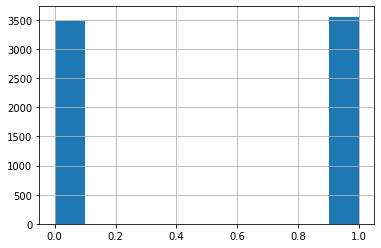

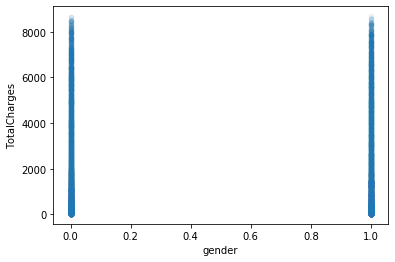

In [405]:
#Analizando algunas variables de interes.
df["gender"].hist() #No hay mucha diferencia en la compañia entre los clientes hombre y mujer. 
#Parece no ser una variable importante dentro del modelo, puesto que es el mismo número.

#Miremos el gráfico de dispersión entre gender y totalcharges
df.plot(kind="scatter", x="gender", y="TotalCharges",alpha=0.08) 
#Efectivamente no hay diferencia significativa entre el sexo del cliente y la cantidad que paga, pues el grafico claramente
#muestra que ambos sexos se distribuyen entre todos los rangos de precios a pagar. Se decide entonces no tener en cuenta la variable
#sexo.


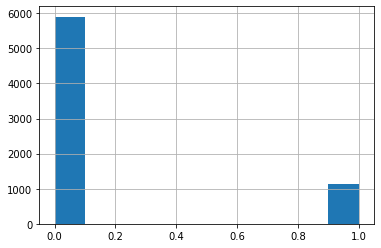

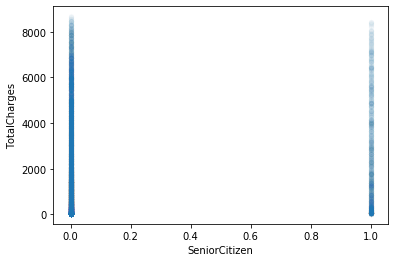

In [406]:
df["SeniorCitizen"].hist() #La cantidad de clientes de la tercera edad, es baja. Podría haber una relación entre la cantidad de
#Clientes que cancelan los servicios y si son ancianos o no. Pues tecnicamente es más fácil que un joven cambie a otra compañia.

#Observemos la relación entre ancianos y el total que pagan.
df.plot(kind="scatter", x="SeniorCitizen", y="TotalCharges",alpha=0.02)
#Como era de esperarse, los ancianos por lo general pagan menos, ya que seguramente tienen menos servicios contratados,
#a diferencia de los jovenes. Se decide tomar en cuenta la variable SeniorCitizen.

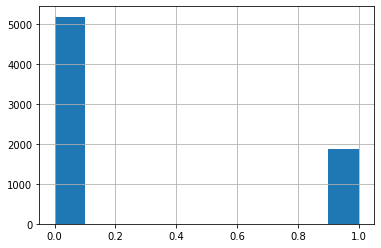

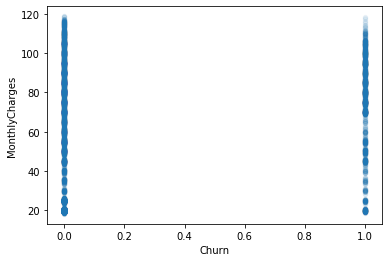

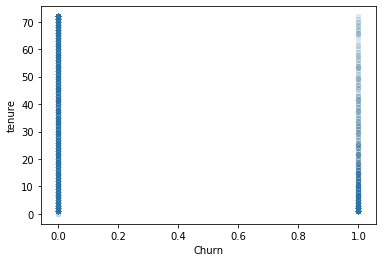

In [317]:
df["Churn"].hist() #Se puede observar como casi cerca de 2000 clientes han cancelado sus servicios. Busquemos una variable que
#este relacionada con esto. Se va a mirar el pago mensual y el número de meses en la compañia.

df.plot(kind="scatter", x="Churn", y="MonthlyCharges",alpha=0.06) #Se puede observar que del total de gente que cancela el
#servicio, la mayoría está ubicado en los pagos mensuales más altos. Se decide entonces tomar en cuenta la variable MonthlyCharges.

df.plot(kind="scatter", x="Churn", y="tenure",alpha=0.02) #Se puede observar como al parecer hay relación entre la gente que cance-
#la los servicios y el tiempo que llevan en la compañia. Cancelan más las personas que llevan menos tiempo en la compañia.
#Se decide tomar en cuenta la variable tenure.


calculo             1.000000
TotalCharges        0.999263
tenure              0.826568
MonthlyCharges      0.651566
MultipleLines       0.452793
Contract            0.446964
StreamingMovies     0.397723
StreamingTV         0.391578
DeviceProtection    0.387428
OnlineBackup        0.374764
Partner             0.317462
TechSupport         0.275336
OnlineSecurity      0.253178
PaperlessBilling    0.158843
PhoneService        0.113336
SeniorCitizen       0.103261
Dependents          0.062290
gender             -0.000029
InternetService    -0.176053
Churn              -0.198514
PaymentMethod      -0.331440
Name: calculo, dtype: float64

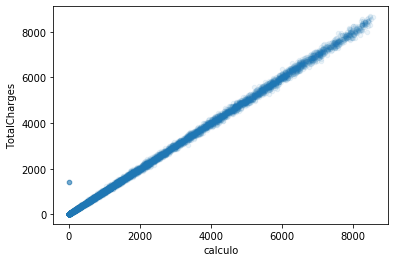

In [407]:
df["calculo"]=df["tenure"]*df["MonthlyCharges"] #Saquemos una nueva variable a partir 2 conocidas.
df.plot(kind="scatter", x="calculo", y="TotalCharges",alpha=0.08) ##Como era de esperarse, la variable TotalCharges, sale
#de calcular el costo mensual de un cliente por el tiempo que lleva en la compañia. Se puede ver en la grafica que la correlación
#Es casi que de 1, por lo que la variable TotalCharges, no se va a tomar en cuenta para el modelo.
corr_matrix = df.corr() 
corr_matrix["calculo"].sort_values(ascending=False) 

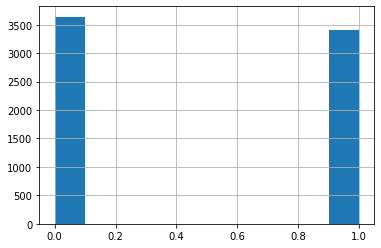

In [408]:
df["Partner"].hist() #La variable partner se decide no tenerla en cuenta, pues la diferencia entre si o no, es muy poca.



clientes sin servicio telefonico:  (682, 21)
Clientes con servicio telefonico:  (6361, 21)
Clientes que no tienen multiples lineas:  (3390, 21)
Clientes con multiples lineas:  (2971, 21)


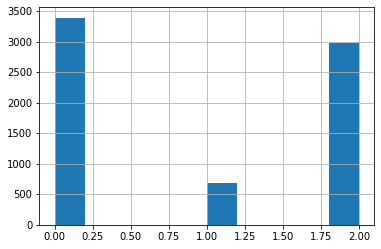

In [409]:
#df["PhoneService"].hist() ##Se puede observar que la cantidad de usuarios que no tienen servicios telefonicos es poca, solo 682.
is_phone = auxiliar['PhoneService']=="No"
is_phone = auxiliar[is_phone]
print("clientes sin servicio telefonico: ",is_phone.shape)
is_phone = auxiliar['PhoneService']=="Yes"
is_phone = auxiliar[is_phone]
print("Clientes con servicio telefonico: ",is_phone.shape)
df["MultipleLines"].hist()
##Hagamos un analísis de MultipleLines.
is_multiple = auxiliar['MultipleLines']=="No"
is_multiple = auxiliar[is_multiple]
print("Clientes que no tienen multiples lineas: ",is_multiple.shape)
is_multiple = auxiliar['MultipleLines']=="Yes"
is_multiple = auxiliar[is_multiple]
print("Clientes con multiples lineas: ", is_multiple.shape) ##3390+ 2971+682=7043->total de entradas, correcto.
##Se decide no tener en cuenta la variable PhoneService, ya que podría estar dandome 2 veces información que ya me está dando
##MultipleLines, entonces se va a tomar MultipleLines para el modelo.

clientes sin servicio de internet:  (1526, 21)
clientes con servicio DSL:  (2421, 21)
clientes con servicio de fibra optica:  (3096, 21)


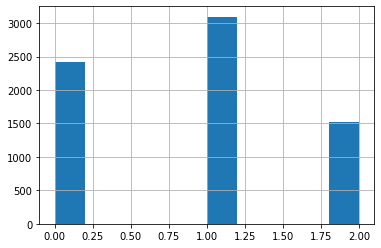

In [328]:
##Analicemos internetService
df["InternetService"].hist() 
is_internet = auxiliar['InternetService']=="No"
is_internet = auxiliar[is_internet]
print("clientes sin servicio de internet: ",is_internet.shape)
is_internet = auxiliar['InternetService']=="DSL"
is_internet = auxiliar[is_internet]
print("clientes con servicio DSL: ",is_internet.shape)
is_internet = auxiliar['InternetService']=="Fiber optic"
is_internet = auxiliar[is_internet]
print("clientes con servicio de fibra optica: ",is_internet.shape)
##Las cantidad de clientes entre las 3 opciones están muy repartidas, por lo que parece prudente tomar en cuenta la variable
##InternetService en el modelo.

clientes sin dependientes:  (4933, 21)


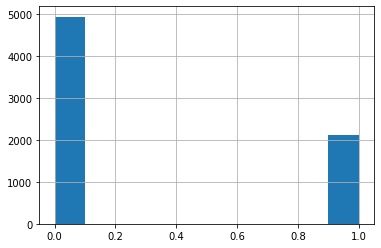

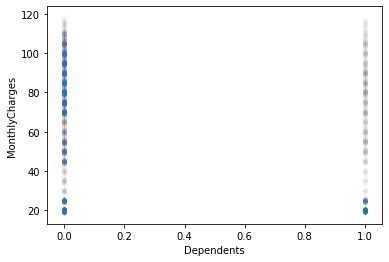

In [410]:
##Entendinedo dependents como si el cliente tiene hijos que dependan de el o no, es buena idea mirar que pasa con esta
##variables. Podría ser que si el cliente tiene hijos, tenga más servicios y por ende pague más mensualmente. Validemos esta 
#Suposición.
df["Dependents"].hist()
is_dependent = auxiliar['Dependents']=="No"
is_dependent = auxiliar[is_dependent]
print("clientes sin dependientes: ",is_dependent.shape)
##Mire la dispersión con respecto al pago mensual.
df.plot(kind="scatter", x="Dependents", y="MonthlyCharges",alpha=0.003)
##El grafico muestra que contrario a lo que se suponía, los clientes con dependientes generalmente son los que menos pagan
#Mensualmente. Se decide entonces tomar en cuenta la variable dependents

In [ ]:
##Finalmente se quiere analizar la variable paymenth method, para mirar como se están distribuyendo los clientes entre los
##diferentes metodos.
df["PaymentMethod"].hist()
payment = auxiliar['PaymentMethod']=="Credit card (automatic)"
payment = auxiliar[payment]
print("clientes que pagan con tarjeta de credito: ",payment.shape)
payment = auxiliar['PaymentMethod']=="Bank transfer (automatic)"
payment = auxiliar[payment]
print("clientes que pagan con transferencia: ",payment.shape)
payment = auxiliar['PaymentMethod']=="Mailed check"
payment = auxiliar[payment]
print("clientes que pagan con mailed check: ",payment.shape)
##Con las 3 primeras opciones de pago, los clientes se distribuyen casi igual. La mayor cantidad de cliente paga por medio de
##ElectronicCheck. Se decide tomar en cuenta la variable PaymentMethod en el modelo.


<h4> Después de haber analizado muchas de las variables del modelo (Las que no se analizaron, es porque no parecían relevantes), se decidio entonces tomar la menor cantidad posible de features, pues es bien sabido que los K vecinos trabaja mejor con baja dimensionalidad. Se pudo haber realizado también un analísis de principales componentes, por cuestiones de tiempo no se hizo.
Dado lo anterior, vamos a trabajar con las variables: SeniorCitizen, MonthlyCharges, tenure, MultipleLines, InternetService, Dependents y PaymentMethod, para tratar de predecir la variable Churn. <h4>

<h3 style="color:blue"> Definamos los conjuntos de entrenamiento y de prueba, así como el normalizado de los datos. El normalizado es importante por los diferentes rangos de valores entre algunas variables y además los K vecinos trabaja mejor con datos normalizados </h3>

In [411]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#defino el vector X con los features a tratar.
X = df[['SeniorCitizen', 'MonthlyCharges','tenure', 'MultipleLines', 'InternetService', 'Dependents', 'PaymentMethod']].values
print(X[0:5]) # chequeando.
#definimos el target
Y = df['Churn'].values
print(y[0:5]) #chequeando.

##NORMALIZAMOS X.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:1]

##Definamos los conjuntons de entramiento y prueba

##Particionando en x train, y train, x test, y tests. Con el 20% de test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
#Este es mi x,y de entrenamiento.

print ('Train set:', X_train.shape,  Y_train.shape)
#Este es el x,y de prueba.
print ('Test set:', X_test.shape,  Y_test.shape)


[[ 0.   29.85  1.    1.    0.    0.    2.  ]
 [ 0.   56.95 34.    0.    0.    0.    3.  ]
 [ 0.   53.85  2.    0.    0.    0.    3.  ]
 [ 0.   42.3  45.    1.    0.    0.    0.  ]
 [ 0.   70.7   2.    0.    1.    0.    2.  ]]
[0. 0. 1. 0. 1.]
Train set: (5634, 7) (5634,)
Test set: (1409, 7) (1409,)


<h3> Después de haber definido los respectivos conjuntos de entrenamiento y de prueba, se procede a desarrollar el algoritmo de los K vecinos, pero primero, se debe hallar el mejor K (número de vecinos) para el modelo </h3>

([<matplotlib.axis.XTick at 0x1d2db572408>,
 <a list of 8 Text xticklabel objects>)

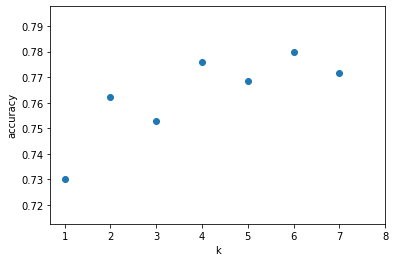

In [412]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 8)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([1,2,3,4,5,6,7,8]) 
##Parece que no se está logrando la mejor precisión posibe, lo maximo a los que se llega es al 78%, con k=6. Resulta conveniente pensar
# añadir una nueva variable al modelo

En el bloque anterior se ve que con las variables seleccionadas y con un k optimo de 6, se logra llegar a una precisión de casi el 79 %. En el bloque siguiente se observará si añadiendo una nueva variable, se puede mejorar dicho valor. Se añade la variable Contract al modelo

[[ 0.   29.85  1.    1.    0.    0.    2.    0.  ]
 [ 0.   56.95 34.    0.    0.    0.    3.    1.  ]
 [ 0.   53.85  2.    0.    0.    0.    3.    0.  ]
 [ 0.   42.3  45.    1.    0.    0.    0.    1.  ]
 [ 0.   70.7   2.    0.    1.    0.    2.    0.  ]]
[0. 0. 1. 0. 1.]
Train set: (5634, 8) (5634,)
Test set: (1409, 8) (1409,)


([<matplotlib.axis.XTick at 0x1d2db2b6a48>,
 <a list of 9 Text xticklabel objects>)

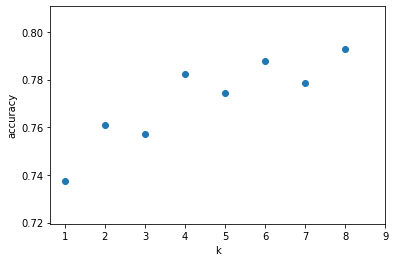

In [413]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#defino el vector X con los features a tratar.
X = df[['SeniorCitizen', 'MonthlyCharges','tenure', 'MultipleLines', 'InternetService', 'Dependents', 'PaymentMethod',"Contract"]].values
print(X[0:5]) # chequeando.
#definimos el target
Y = df['Churn'].values
print(y[0:5]) #chequeando.

##NORMALIZAMOS X.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:1]

##Definamos los conjuntons de entramiento y prueba

##Particionando en x train, y train, x test, y tests. Con el 20% de test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
#Este es mi x,y de entrenamiento.

print ('Train set:', X_train.shape,  Y_train.shape)
#Este es el x,y de prueba.
print ('Test set:', X_test.shape,  Y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 9)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([1,2,3,4,5,6,7,8,9]) 
#Con el nuevo feature y k=8, se está llegando casí al 80% de la precisión.


Con la nueva variable que se añadió al modelo y con 8 vecinos, se pudo llegar a una precisión de casi el 80% para el conjunto de prueba, lo cual es un valor aceptable.
En el bloque siguiente se formaliza lo anterior y se detallan los resultados.

In [414]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
n_neighbors = 8 #numero de vecinos
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, Y_train)
print('Precisión en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Precisión en el conjunto de prueba: {:.2f}'
     .format(knn.score(X_test, Y_test)))


pred = knn.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

Precisión en el conjunto de entrenamiento: 0.83
Precisión en el conjunto de prueba: 0.79
[[953  82]
 [210 164]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1035
         1.0       0.67      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



<h3 style="color:blue">Con un F1 scrore del 79%, se puede decir que el modelo finalmente logra clasificar si un cliente cancelará los servicios con la compañia o no, con una exactitud del 79%. Es un valor bueno, pero con toda seguridad podría mejorarse, analizando más a fondo las variables y los principales componentes. Por cuestiones de tiempo no se hará esa tarea en este momento y se va a aceptar un modelo con el 79% de la precisión.</h3>